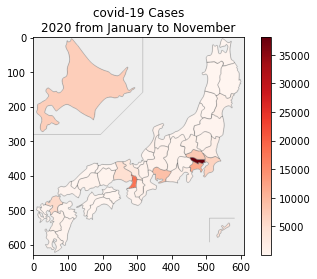

In [43]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from japanmap import picture
import datetime

dt_now = datetime.datetime.now()
day = str(dt_now.day)
month = str(dt_now.month)
# month2は英語表記
month2 = dt_now.strftime('%B')

# コロナAPIからデータフレームの作成
df = pd.read_json("http://localhost:8000/")
#print(df)
#df = df.drop(["PCR検査実施人数", "入院治療等を要する者（人）", "うち重症", 
#                "退院又は療養解除となった者の数（人）", "死亡（累積）（人）", 
#              "確認中（人）",], axis=1)
df = df[1:49].set_index('都道府県名')
df

# japanmapで出力
cmap = plt.get_cmap('Reds')
norm = plt.Normalize(vmin=df.陽性者数.min(), vmax=df.陽性者数.max())
fcol = lambda x: '#' + bytes(cmap(norm(x), bytes=True)[:3]).hex()
plt.colorbar(plt.cm.ScalarMappable(norm, cmap))
plt.title("covid-19 Cases\n2020 from January to " + month2)
plt.imshow(picture(df.陽性者数.apply(fcol)));
plt.savefig('covid_cases_img/covid-19_Cases_' + month + '_' + day + '.png')